In [167]:
import os
os.listdir('./')

['svelte.config.js',
 '.DS_Store',
 'svg_tooltip.svg',
 'Untitled.ipynb',
 'node_modules',
 'crime_map.csv',
 '.npmrc',
 'README.md',
 'ChicagoDataScience.ipynb',
 '.gitignore',
 'package-lock.json',
 'package.json',
 'static',
 'Crimes_-_Map.csv',
 'chicagodata.json',
 'tsconfig.json',
 '.ipynb_checkpoints',
 '.svelte-kit',
 'vite.config.ts',
 '.git',
 'src']

In [168]:
import geopandas as gpd
df_neighborhoods = gpd.read_file('./src/Boundaries - Neighborhoods.json')

In [365]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Crimes_-_Map.csv')
df[' PRIMARY DESCRIPTION'].unique()
df[' PRIMARY DESCRIPTION'].value_counts()

THEFT                                55752
BATTERY                              41453
CRIMINAL DAMAGE                      28345
MOTOR VEHICLE THEFT                  24700
ASSAULT                              21296
DECEPTIVE PRACTICE                   15831
OTHER OFFENSE                        14682
ROBBERY                               9152
WEAPONS VIOLATION                     8945
BURGLARY                              7698
CRIMINAL TRESPASS                     4443
NARCOTICS                             4351
OFFENSE INVOLVING CHILDREN            1910
CRIMINAL SEXUAL ASSAULT               1516
SEX OFFENSE                           1209
PUBLIC PEACE VIOLATION                 748
HOMICIDE                               702
STALKING                               452
ARSON                                  448
INTERFERENCE WITH PUBLIC OFFICER       416
PROSTITUTION                           303
LIQUOR LAW VIOLATION                   216
INTIMIDATION                           211
CONCEALED C

In [170]:
new_df = df.drop(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR', ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LOCATION'], axis=1)
new_df = new_df.dropna()
new_df.insert(0, "NEIGHBORHOOD", np.nan)
new_df.head()

,NEIGHBORHOOD,PRIMARY DESCRIPTION,ARREST,DOMESTIC,LATITUDE,LONGITUDE
11,NaN,THEFT,N,N,41.886801,-87.645920
14,NaN,ASSAULT,N,Y,41.880751,-87.723856
15,NaN,THEFT,N,N,42.018616,-87.665846
33,NaN,DECEPTIVE PRACTICE,N,N,41.806859,-87.732124
47,NaN,CRIMINAL TRESPASS,Y,N,41.854763,-87.689136


In [268]:
import shapely
from shapely.geometry import LineString, Point, Polygon, MultiPolygon
from shapely.strtree import STRtree

index = STRtree(df_neighborhoods.geometry.tolist())



In [172]:
for ind, i in enumerate(new_df.index):
    point = Point(new_df['LONGITUDE'][i],new_df['LATITUDE'][i])
    for polygon in index.query(point):
        new_df['NEIGHBORHOOD'][i] = (df_neighborhoods['pri_neigh'][polygon])
    

In [173]:
df_neighborhoods.head()

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60668 41.815..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"POLYGON ((-87.62742 41.86741, -87.63044 41.867..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66706 41.887..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"POLYGON ((-87.65871 41.93256, -87.65472 41.932..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74069 41.890..."


In [174]:
so_df = new_df[(new_df[' PRIMARY DESCRIPTION'] == "MOTOR VEHICLE THEFT")]

In [175]:
a_df = so_df[so_df['ARREST'] == 'Y']
so_df.head()

,NEIGHBORHOOD,PRIMARY DESCRIPTION,ARREST,DOMESTIC,LATITUDE,LONGITUDE
157,Austin,MOTOR VEHICLE THEFT,N,N,41.912674,-87.752764
165,Gage Park,MOTOR VEHICLE THEFT,N,N,41.794691,-87.692606
170,Auburn Gresham,MOTOR VEHICLE THEFT,N,N,41.749649,-87.645227
173,Avondale,MOTOR VEHICLE THEFT,N,N,41.936854,-87.720172
179,"Little Italy, UIC",MOTOR VEHICLE THEFT,N,N,41.872965,-87.687511


In [176]:
a_df.value_counts(subset="NEIGHBORHOOD", normalize=False)

NEIGHBORHOOD
Austin             64
North Lawndale     30
Garfield Park      28
Englewood          23
Humboldt Park      21
                   ..
Calumet Heights     1
Riverdale           1
Bridgeport          1
Beverly             1
Fuller Park         1
Length: 76, dtype: int64

In [177]:
vals = new_df[(new_df[' PRIMARY DESCRIPTION'] == "MOTOR VEHICLE THEFT")]['NEIGHBORHOOD'].value_counts()
vals_ind = vals.index
print(vals)

Austin            1443
South Shore       1189
Roseland          1103
Grand Crossing     981
Garfield Park      832
                  ... 
Greektown           16
Edison Park         12
Jefferson Park       7
Burnside             4
Andersonville        1
Name: NEIGHBORHOOD, Length: 91, dtype: int64


In [178]:
df_neighborhoods.insert(0, "num_motor_thefts", np.nan)

In [179]:
for i in df_neighborhoods['pri_neigh'].index:
    if df_neighborhoods['pri_neigh'][i] in vals_ind:
        df_neighborhoods['num_motor_thefts'][i] = vals[df_neighborhoods['pri_neigh'][i]]
    else:
        df_neighborhoods['num_motor_thefts'][i] = 0

/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/4165206342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods['num_motor_thefts'][i] = vals[df_neighborhoods['pri_neigh'][i]]
/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/4165206342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods['num_motor_thefts'][i] = 0


<Axes: >

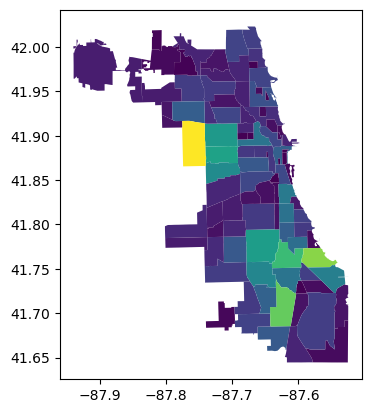

In [180]:
df_neighborhoods.plot(column="num_motor_thefts")

In [181]:
df_neighborhoods.to_file("chicagodata.json")

In [182]:
df_neighborhoods['pri_neigh'][1]

'Printers Row'

In [183]:
df_neighborhoods["num_motor_thefts"] = df_neighborhoods["num_motor_thefts"] / 1443

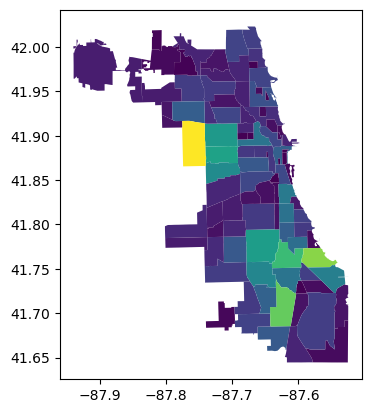

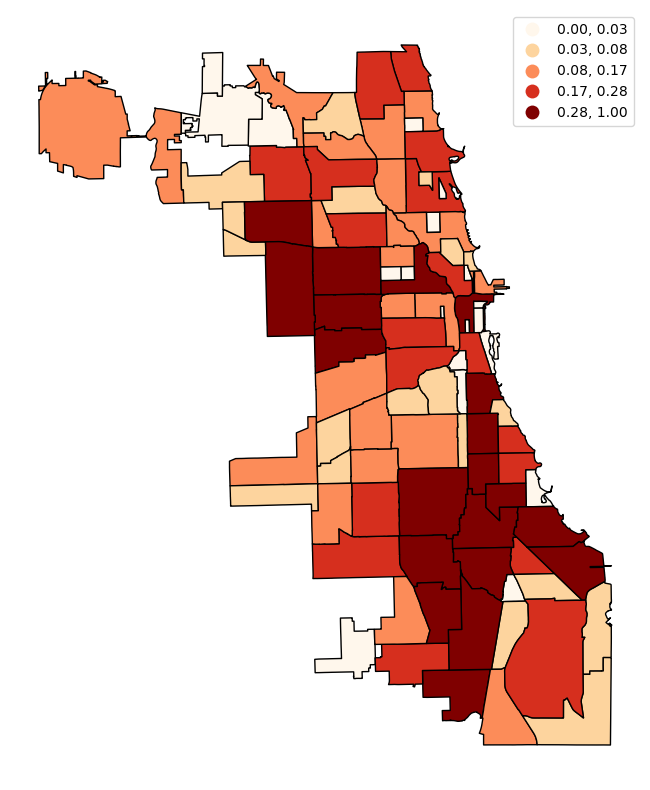

In [184]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify

df_neighborhoods.plot(column="num_motor_thefts", missing_kwds={'color': 'lightgrey'})

df_neighborhoods.plot(column="num_motor_thefts",
                               edgecolor="black",
                               legend=True,
                               scheme="quantiles",
                               figsize=(15,10),
                               cmap='OrRd',
                               missing_kwds={
                                   "color": "lightgrey",
                                   "edgecolor": "red",
                                   "hatch": "///",
                                   "label": "No theft"
                               }).set_axis_off()

In [185]:
for i in df_neighborhoods[df_neighborhoods["num_motor_thefts"] == 0].index:
    df_neighborhoods["num_motor_thefts"][i] = np.nan

/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/1632226341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighborhoods["num_motor_thefts"][i] = np.nan


In [186]:
theft_df = new_df[new_df[' PRIMARY DESCRIPTION'] == 'THEFT']
motor_theft_df = new_df[new_df[' PRIMARY DESCRIPTION'] == 'MOTOR VEHICLE THEFT']
motor_theft_df.insert(0, 'geometry', np.nan)
theft_df.insert(0, 'geometry', np.nan)
theft_coords = list(zip(theft_df['LONGITUDE'], theft_df['LATITUDE']))
motor_theft_coords = list(zip(motor_theft_df['LONGITUDE'], theft_df['LATITUDE']))

In [202]:
for i, ind in enumerate(motor_theft_df['geometry'].index):
     motor_theft_df['geometry'][ind] = Point(motor_theft_df['LONGITUDE'][ind], motor_theft_df['LATITUDE'][ind])

for i, ind in enumerate(theft_df['geometry'].index):
     theft_df['geometry'][ind] = Point(theft_df['LONGITUDE'][ind], theft_df['LATITUDE'][ind])

/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/660324257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_theft_df['geometry'][ind] = Point(motor_theft_df['LONGITUDE'][ind], motor_theft_df['LATITUDE'][ind])
/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/660324257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['geometry'][ind] = Point(theft_df['LONGITUDE'][ind], theft_df['LATITUDE'][ind])


In [203]:
motor_theft_df

,geometry,NEIGHBORHOOD,PRIMARY DESCRIPTION,ARREST,DOMESTIC,LATITUDE,LONGITUDE
157,POINT (-87.752764058 41.912673714),Austin,MOTOR VEHICLE THEFT,N,N,41.912674,-87.752764
165,POINT (-87.692605888 41.794690928),Gage Park,MOTOR VEHICLE THEFT,N,N,41.794691,-87.692606
170,POINT (-87.64522669 41.749649216),Auburn Gresham,MOTOR VEHICLE THEFT,N,N,41.749649,-87.645227
173,POINT (-87.720172313 41.936853833),Avondale,MOTOR VEHICLE THEFT,N,N,41.936854,-87.720172
179,POINT (-87.687510515 41.872964607),"Little Italy, UIC",MOTOR VEHICLE THEFT,N,N,41.872965,-87.687511
...,...,...,...,...,...,...,...
245162,POINT (-87.641772074 41.881847601),West Loop,MOTOR VEHICLE THEFT,N,N,41.881848,-87.641772
245164,POINT (-87.687393113 41.917061131),Bucktown,MOTOR VEHICLE THEFT,N,N,41.917061,-87.687393
245176,POINT (-87.602187052 41.776307684),Woodlawn,MOTOR VEHICLE THEFT,N,N,41.776308,-87.602187
245177,POINT (-87.592907065 41.74514439),Avalon Park,MOTOR VEHICLE THEFT,N,N,41.745144,-87.592907


In [199]:
import geoplot as gplt
import geopandas as gpd
import pandas as pd; 


usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()


,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [200]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR", "TX", "FL"]')
continental_usa_cities.head()



,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [288]:
theft_g = gpd.GeoDataFrame(geometry=theft_df['geometry'])
motor_theft_g = gpd.GeoDataFrame(geometry=motor_theft_df['geometry'])
geometry = gpd.GeoDataFrame(geometry=df_neighborhoods["geometry"])
geometry

,geometry
0,"POLYGON ((-87.60671 41.81681, -87.60668 41.815..."
1,"POLYGON ((-87.62742 41.86741, -87.63044 41.867..."
2,"POLYGON ((-87.66707 41.88885, -87.66706 41.887..."
3,"POLYGON ((-87.65871 41.93256, -87.65472 41.932..."
4,"POLYGON ((-87.74060 41.88782, -87.74069 41.890..."
...,...
93,"POLYGON ((-87.74134 41.91390, -87.74601 41.914..."
94,"POLYGON ((-87.74134 41.91390, -87.74130 41.912..."
95,"POLYGON ((-87.62446 41.91157, -87.62466 41.911..."
96,"POLYGON ((-87.64878 41.93999, -87.64927 41.939..."


In [330]:
motor_theft_g["weights"] = float(0.0001836547)
theft_g["weights"] = float(0.0004075643)

<Axes: >

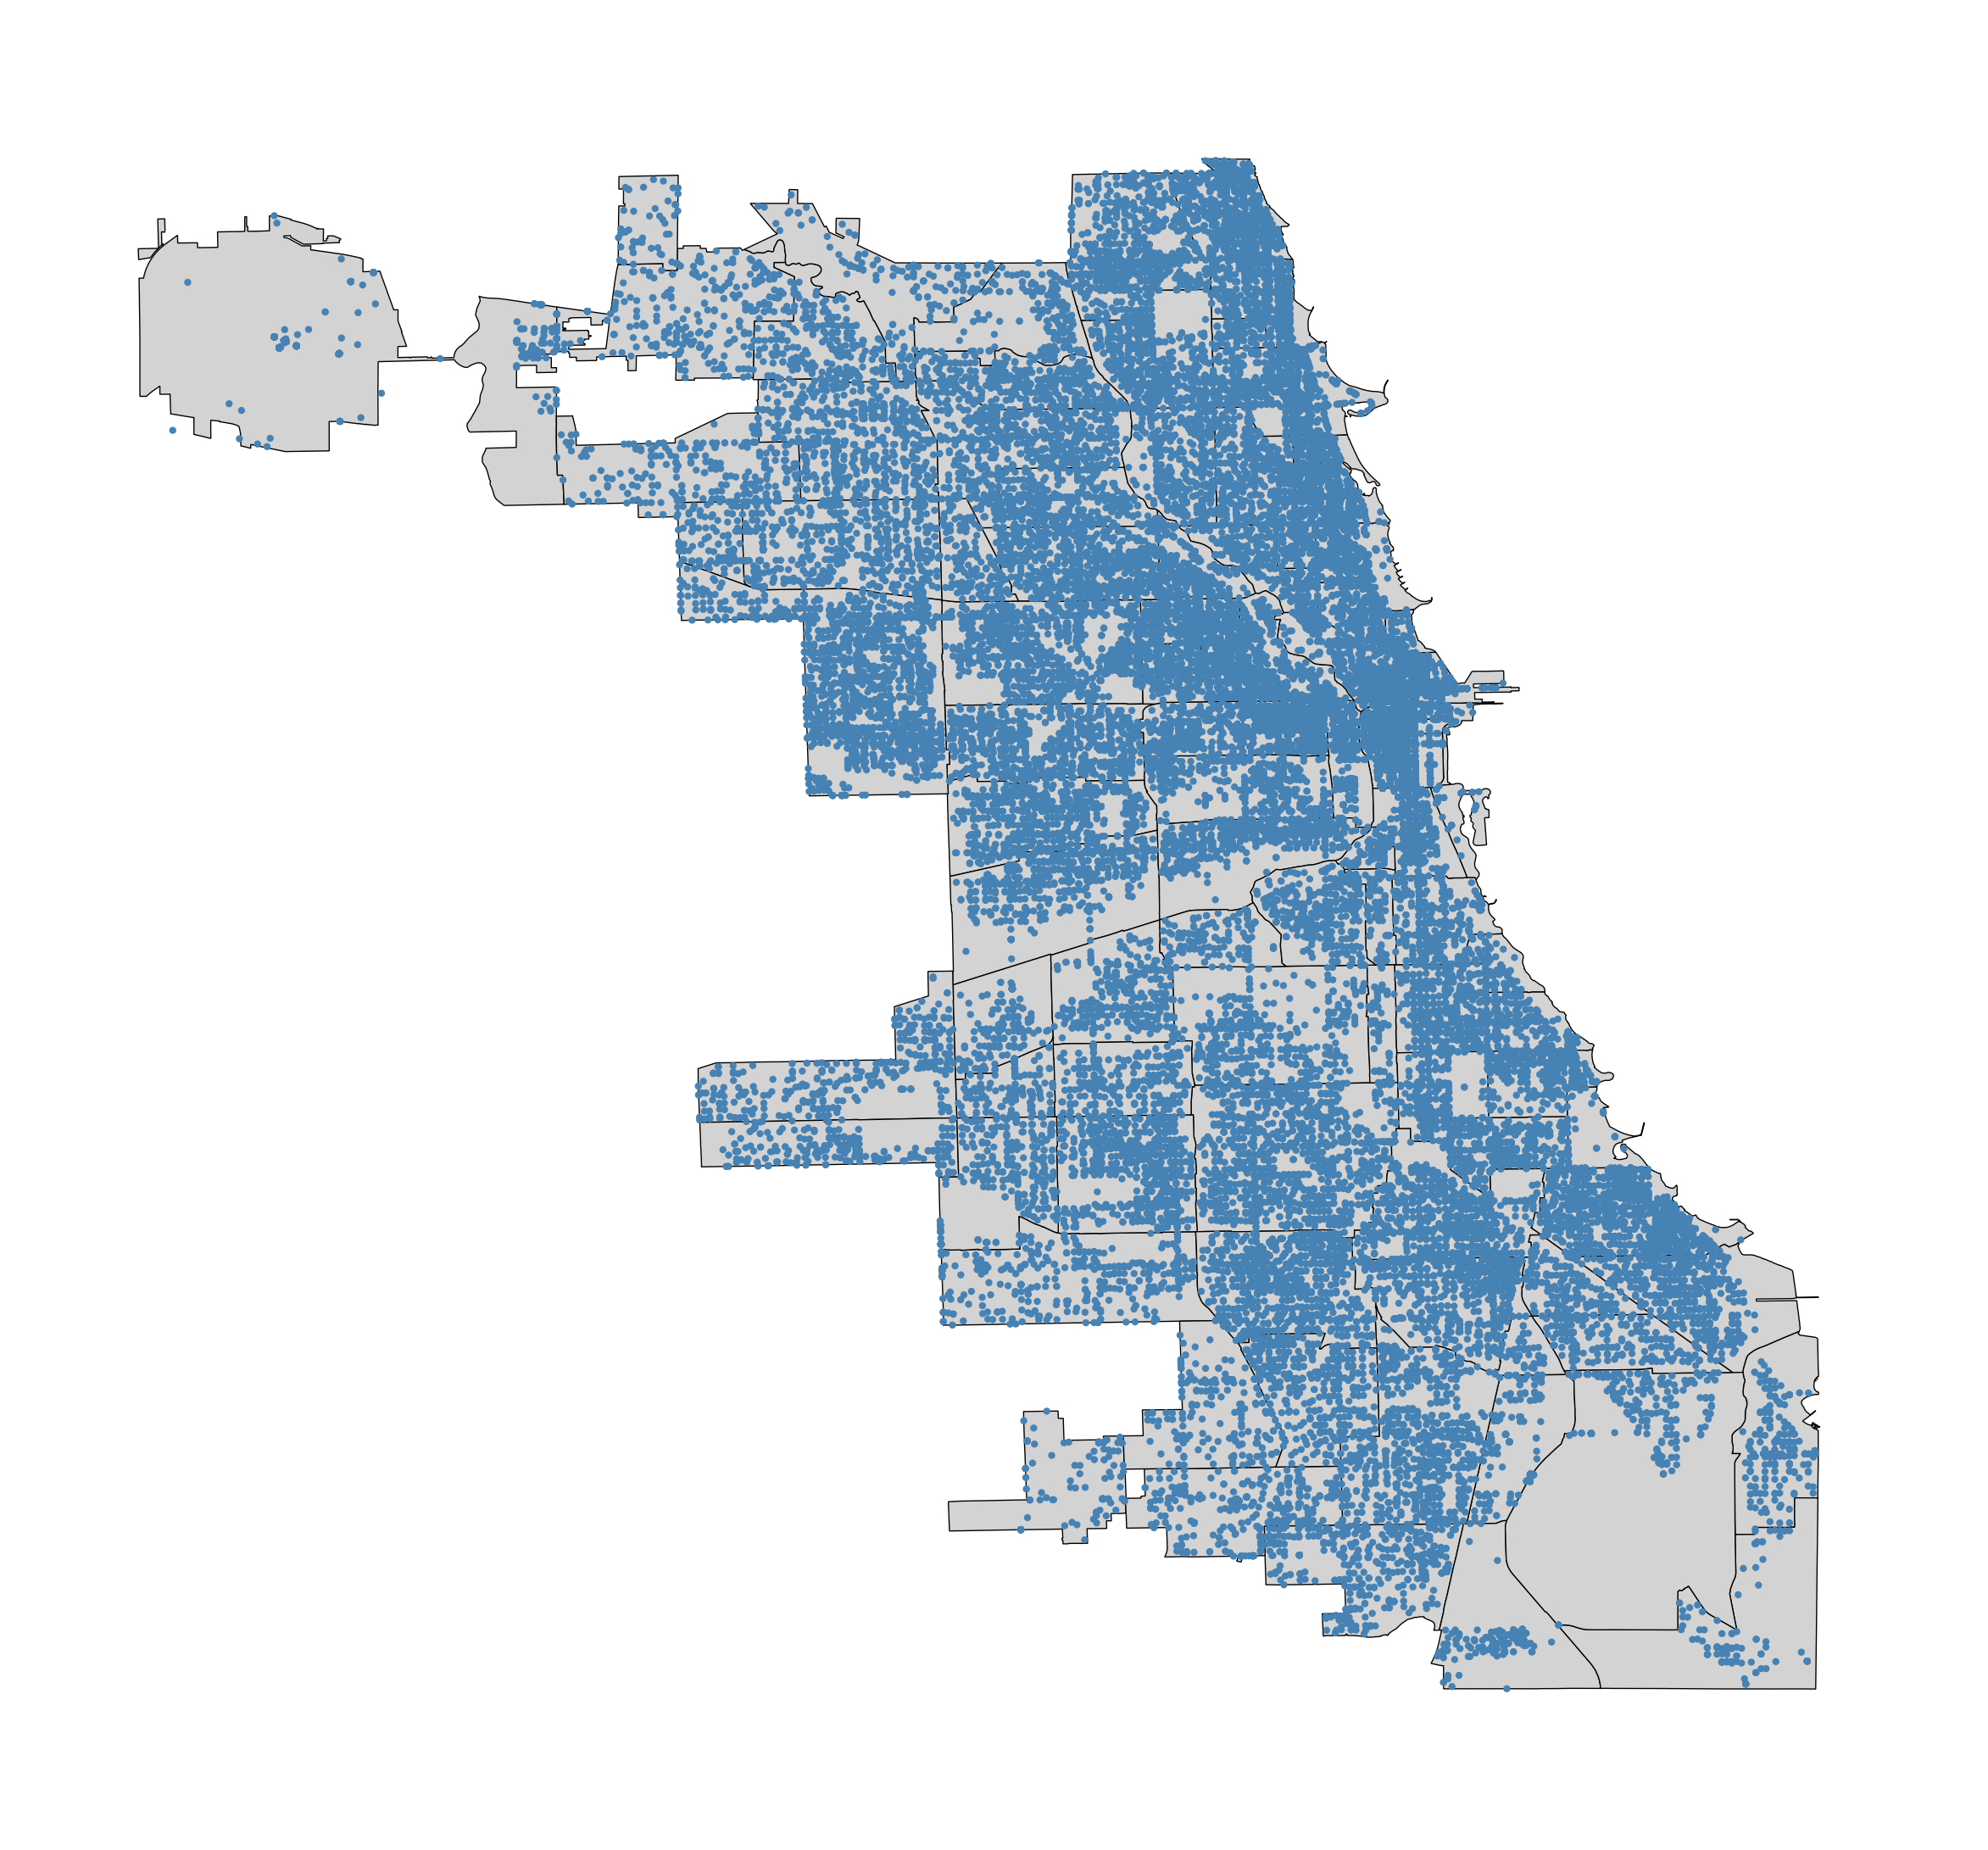

In [370]:
ax1 = gplt.polyplot(df_neighborhoods["geometry"].explode(ignore_index=True),    zorder=-1,
    linewidth=1,
    edgecolor='black',
    facecolor='lightgray',
    figsize=(30, 30))
gplt.pointplot(theft_g,legend_kwargs={ "marker":'o',"markersize": "0.1"}, ax=ax1)



/var/folders/q2/blj1b35943190bxj_nqhbpy0w9ff45/T/ipykernel_5561/3825684158.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  ax2 = gplt.polyplot(df_neighborhoods["geometry"].explode(),linewidth=1 ,  edgecolor='white',


<Axes: >

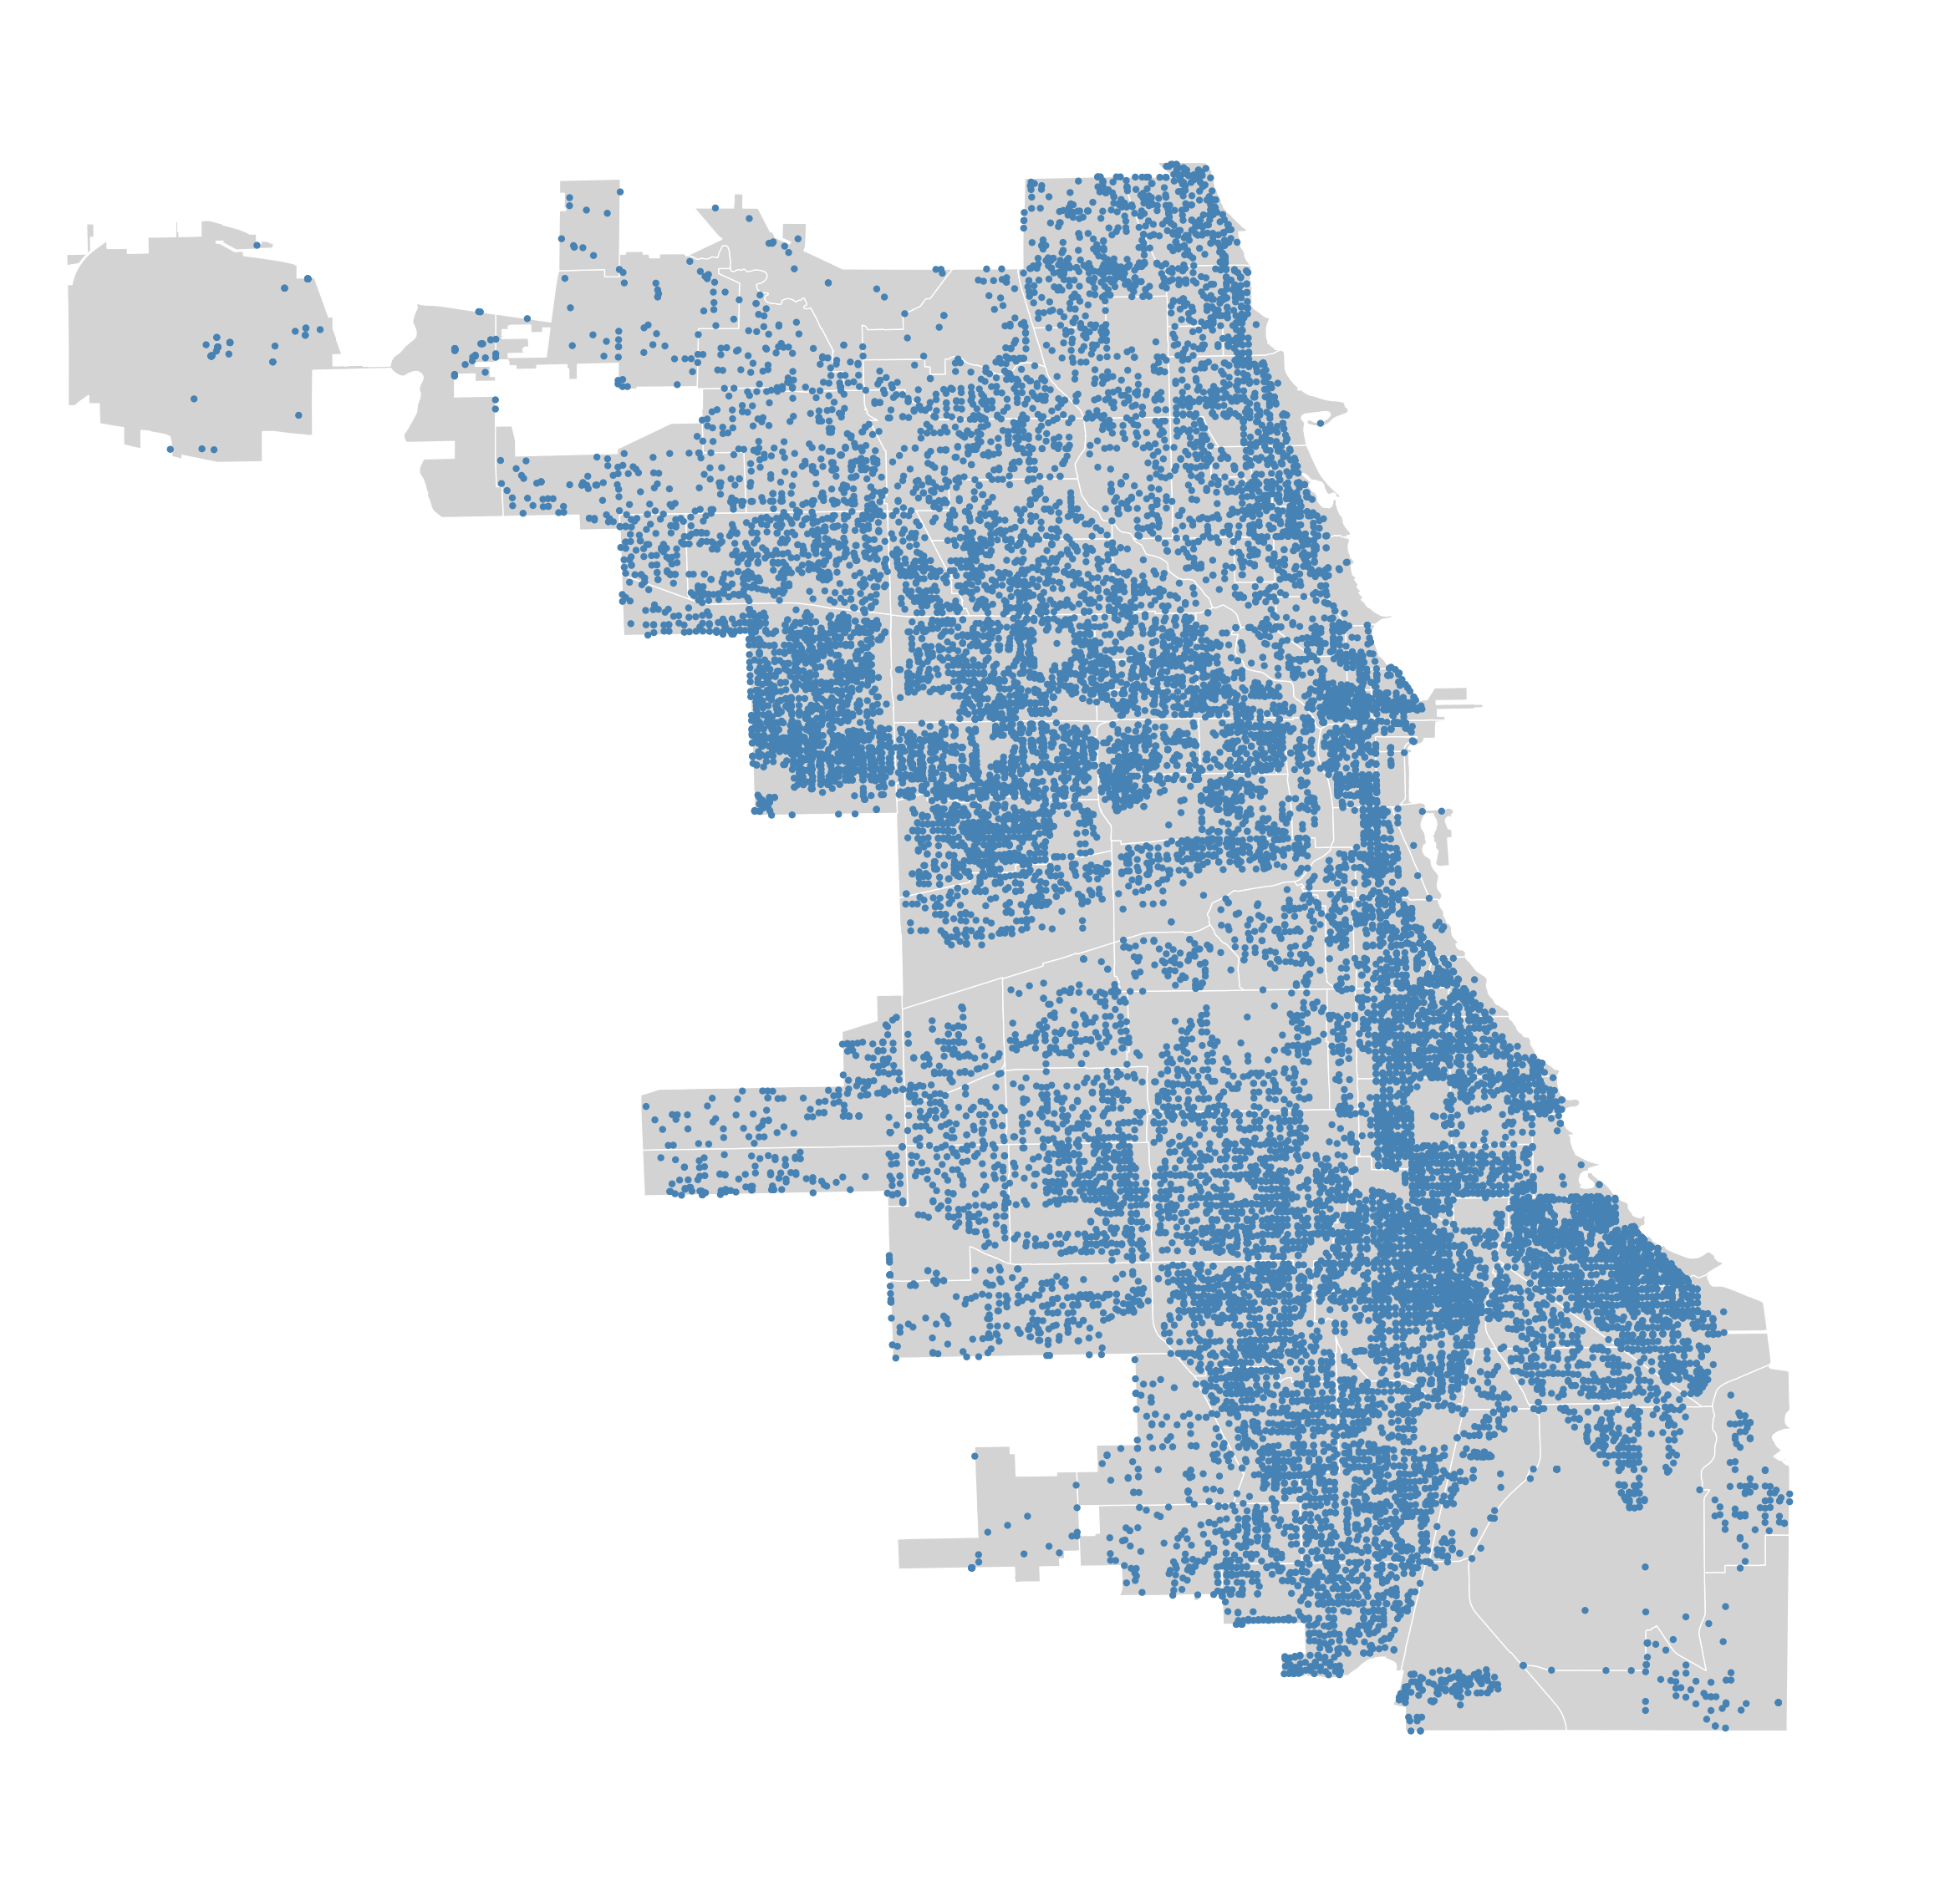

In [358]:
ax2 = gplt.polyplot(df_neighborhoods["geometry"].explode(),linewidth=1 ,  edgecolor='black',
    facecolor='lightgray', figsize=(30,30))
gplt.pointplot(motor_theft_g,legend_kwargs={ "marker":'o',"markersize": "0.1"}, ax=ax2)


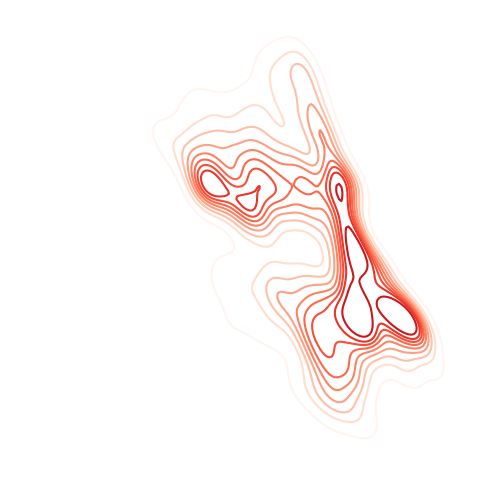

In [361]:
motor_theft_kde = gplt.kdeplot(motor_theft_g,  cmap='Reds')


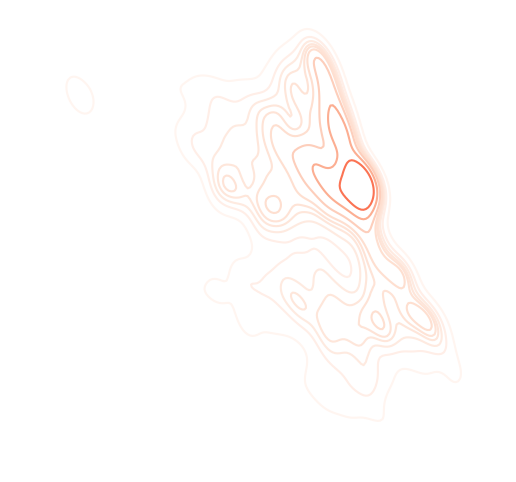

In [367]:
theft_kde = gplt.kdeplot(theft_g, cmap='Reds', legend=True)


In [450]:
motor_theft_kde.collections[5].get_facecolors()

array([], shape=(0, 4), dtype=float64)

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

gplt.pointplot(collisions)

/Users/tony.qing/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


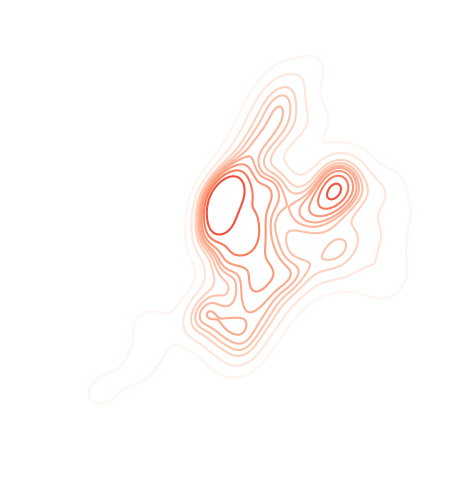

In [293]:
ax = gplt.kdeplot(collisions, cmap='Reds', shade=False, projection=gcrs.AlbersEqualArea())


In [415]:
for i in motor_theft_kde.get_children():
    print(i)


Spine
Spine
Spine
Spine
XAxis(171.2824086907758,65.99999999999999)
YAxis(171.2824086907758,65.99999999999999)
Text(0.5, 1.0, '')
Text(0.0, 1.0, '')
Text(1.0, 1.0, '')
Rectangle(xy=(0, 0), width=1, height=1, angle=0)


In [423]:
polygons = []
for i in theft_kde.get_children():
    if str(type(i)) == "<class 'matplotlib.collections.PathCollection'>":
        for path in i.get_paths():
            polygons.append(Polygon(path.to_polygons()[0]))

In [424]:
heatmap = gpd.GeoDataFrame(geometry=polygons)

<Axes: >

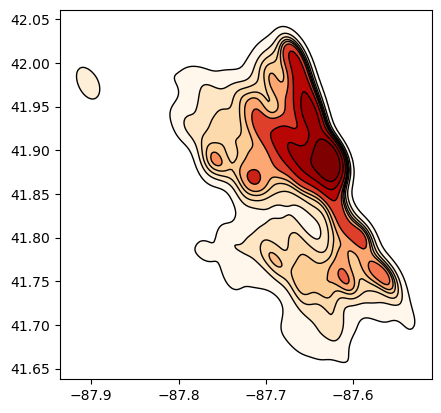

In [425]:
heatmap.plot(edgecolor="black", cmap="OrRd")

In [426]:
polygons

[<POLYGON ((-87.621 41.659, -87.618 41.658, -87.616 41.658, -87.614 41.657, -...>,
 <POLYGON ((-87.901 41.959, -87.899 41.959, -87.897 41.959, -87.895 41.959, -...>,
 <POLYGON ((-87.625 41.682, -87.623 41.682, -87.621 41.682, -87.62 41.682, -8...>,
 <POLYGON ((-87.625 41.712, -87.625 41.712, -87.623 41.715, -87.623 41.715, -...>,
 <POLYGON ((-87.634 41.732, -87.632 41.731, -87.63 41.731, -87.627 41.731, -8...>,
 <POLYGON ((-87.688 41.767, -87.686 41.766, -87.683 41.766, -87.682 41.768, -...>,
 <POLYGON ((-87.607 41.74, -87.604 41.74, -87.603 41.74, -87.602 41.74, -87.6...>,
 <POLYGON ((-87.757 41.883, -87.755 41.882, -87.753 41.882, -87.751 41.883, -...>,
 <POLYGON ((-87.563 41.746, -87.56 41.746, -87.559 41.747, -87.558 41.749, -8...>,
 <POLYGON ((-87.611 41.748, -87.609 41.747, -87.607 41.747, -87.605 41.749, -...>,
 <POLYGON ((-87.59 41.788, -87.588 41.787, -87.586 41.788, -87.586 41.789, -8...>,
 <POLYGON ((-87.716 41.862, -87.713 41.861, -87.711 41.861, -87.709 41.862, -...>,
 <PO

In [427]:
gdf = gpd.GeoDataFrame(geometry=polygons)

In [428]:
gdf.to_file("kde_theft.json")

In [430]:
chicago_neighborhoods = gpd.read_file("./../chi_data_science/chicagodata.json")


In [433]:
chicago_boundary = chicago_neighborhoods.unary_union

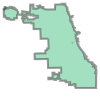

In [434]:
chicago_boundary

In [439]:
chicago_outline = gpd.GeoDataFrame(geometry=[chicago_boundary])


In [440]:
chicago_outline

,geometry
0,"MULTIPOLYGON (((-87.69615 41.68803, -87.69661 ..."


In [441]:
chicago_outline.to_file("chicago_outline.json")

In [451]:
community_df = pd.read_csv("./community_data.csv")

In [452]:
community_df.head()

,Community Area,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,name,Rogers Park,West Ridge,Uptown,Lincoln Square,North Center,Lake View,Lincoln Park,Near North Side,Edison Park,...,Englewood,Greater Grand Crossing,Ashburn,Auburn Gresham,Beverly,Washington Heights,Mount Greenwood,Morgan Park,O'Hare,Edgewater
1,population,54991,71942,56362,39493,31867,94368,64116,80484,11187,...,30654,32602,41081,48743,20034,26493,19093,22544,12756,56521
2,income,39482,47323,40324,57749,81524,70746,82707,76290,77678,...,19743,29663,62238,34767,83092,42053,80505,56886,49601,43331
3,requests,3204.8880725907,3906.3412193156,2164.0466981295,3827.2605271849,5307.9988703031,2742.2431332668,3408.6655437027,1717.6084687635,4754.6259050653,...,5459.646375673,6296.85295381,5599.4255251814,5785.446115344,6985.125287016,6641.7544256946,4357.6179751737,6264.1944641542,1552.9946691765,2564.8873869877
4,latinos,0.244,0.204,0.142,0.191,0.136,0.076,0.056,0.049,0.078,...,0.011,0.012,0.368,0.009,0.046,0.01,0.072,0.027,0.095,0.165


In [461]:
new_df['name']

KeyError: 'name'

In [459]:
df_neighborhoods.pri_neigh

0        Grand Boulevard
1           Printers Row
2          United Center
3     Sheffield & DePaul
4          Humboldt Park
             ...        
93        Belmont Cragin
94                Austin
95            Gold Coast
96              Boystown
97           River North
Name: pri_neigh, Length: 98, dtype: object